# Lab 03. Weather Predict Competition

This lab consists of only one task: train a model to predict if it is going to rain the next day:
- Classification metric is **roc-auc**
- Score should be calculated on a hold-out set (don't use it for training)


#### Evaluation
- Score > 0.860 - 3 points
- Score > 0.865 - 5 points
- Score > 0.870 - 7 points
- Score > 0.875 - 9 points
- Score > 0.880 - 11 points
- Score > 0.885 - 13 points
- Score > 0.890 - 15 points
- You are encouraged to use various methods and tricks to get extra points

#### Do not use any external data or models that were not covered in the course (no gradient boosting and  neural nets).


#### How to submit
- Name your file according to this convention: `2022_lab03_GroupNumber_Surname_Name.ipynb`, for example 
    - `2022_lab03_404_Sheipak_Sviat.ipynb`
    - `2022_lab03_NoGroup_Sheipak_Sviat.ipynb`
- Attach your .ipynb to an email with topic `2022_lab02_GroupNumber_Surname_Name`
- Send it to `cosmic.research.ml@yandex.ru`
- Deadline is ` 22022-11-03 23:00:00 +03:00`

#### The Data:
- All the datasets you need are here: https://github.com/cosmic-research-ml-edu/intro_ml_2022/blob/main/homeworks/hw03/train.csv

In [1]:
import pandas as pd
import numpy as np

In [2]:
db_train = pd.read_csv("holdout_data/train.csv")
db_test = pd.read_csv("holdout_data/holdout.csv")

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [4]:
target_col = "raintomorrow"
id_cols = ["row_id"]

In [5]:
Y_train = db_train[target_col].values
db_train.drop(columns=[target_col], inplace=True)

Y_test = db_test[target_col].values
db_test.drop(columns=[target_col], inplace=True)

In [6]:
numeric_cols = [x for x in db_train.select_dtypes(include=np.number).columns.tolist() if x not in id_cols]

In [7]:
X_train = db_train[numeric_cols].fillna(-9999).values
X_test = db_test[numeric_cols].fillna(-9999).values

In [11]:
clf = RandomForestClassifier()

clf.fit(X_train, Y_train)
preds = clf.predict_proba(X_test)[:, 1]
roc_auc_score(Y_test, preds)

0.856789874125026

<AxesSubplot:>

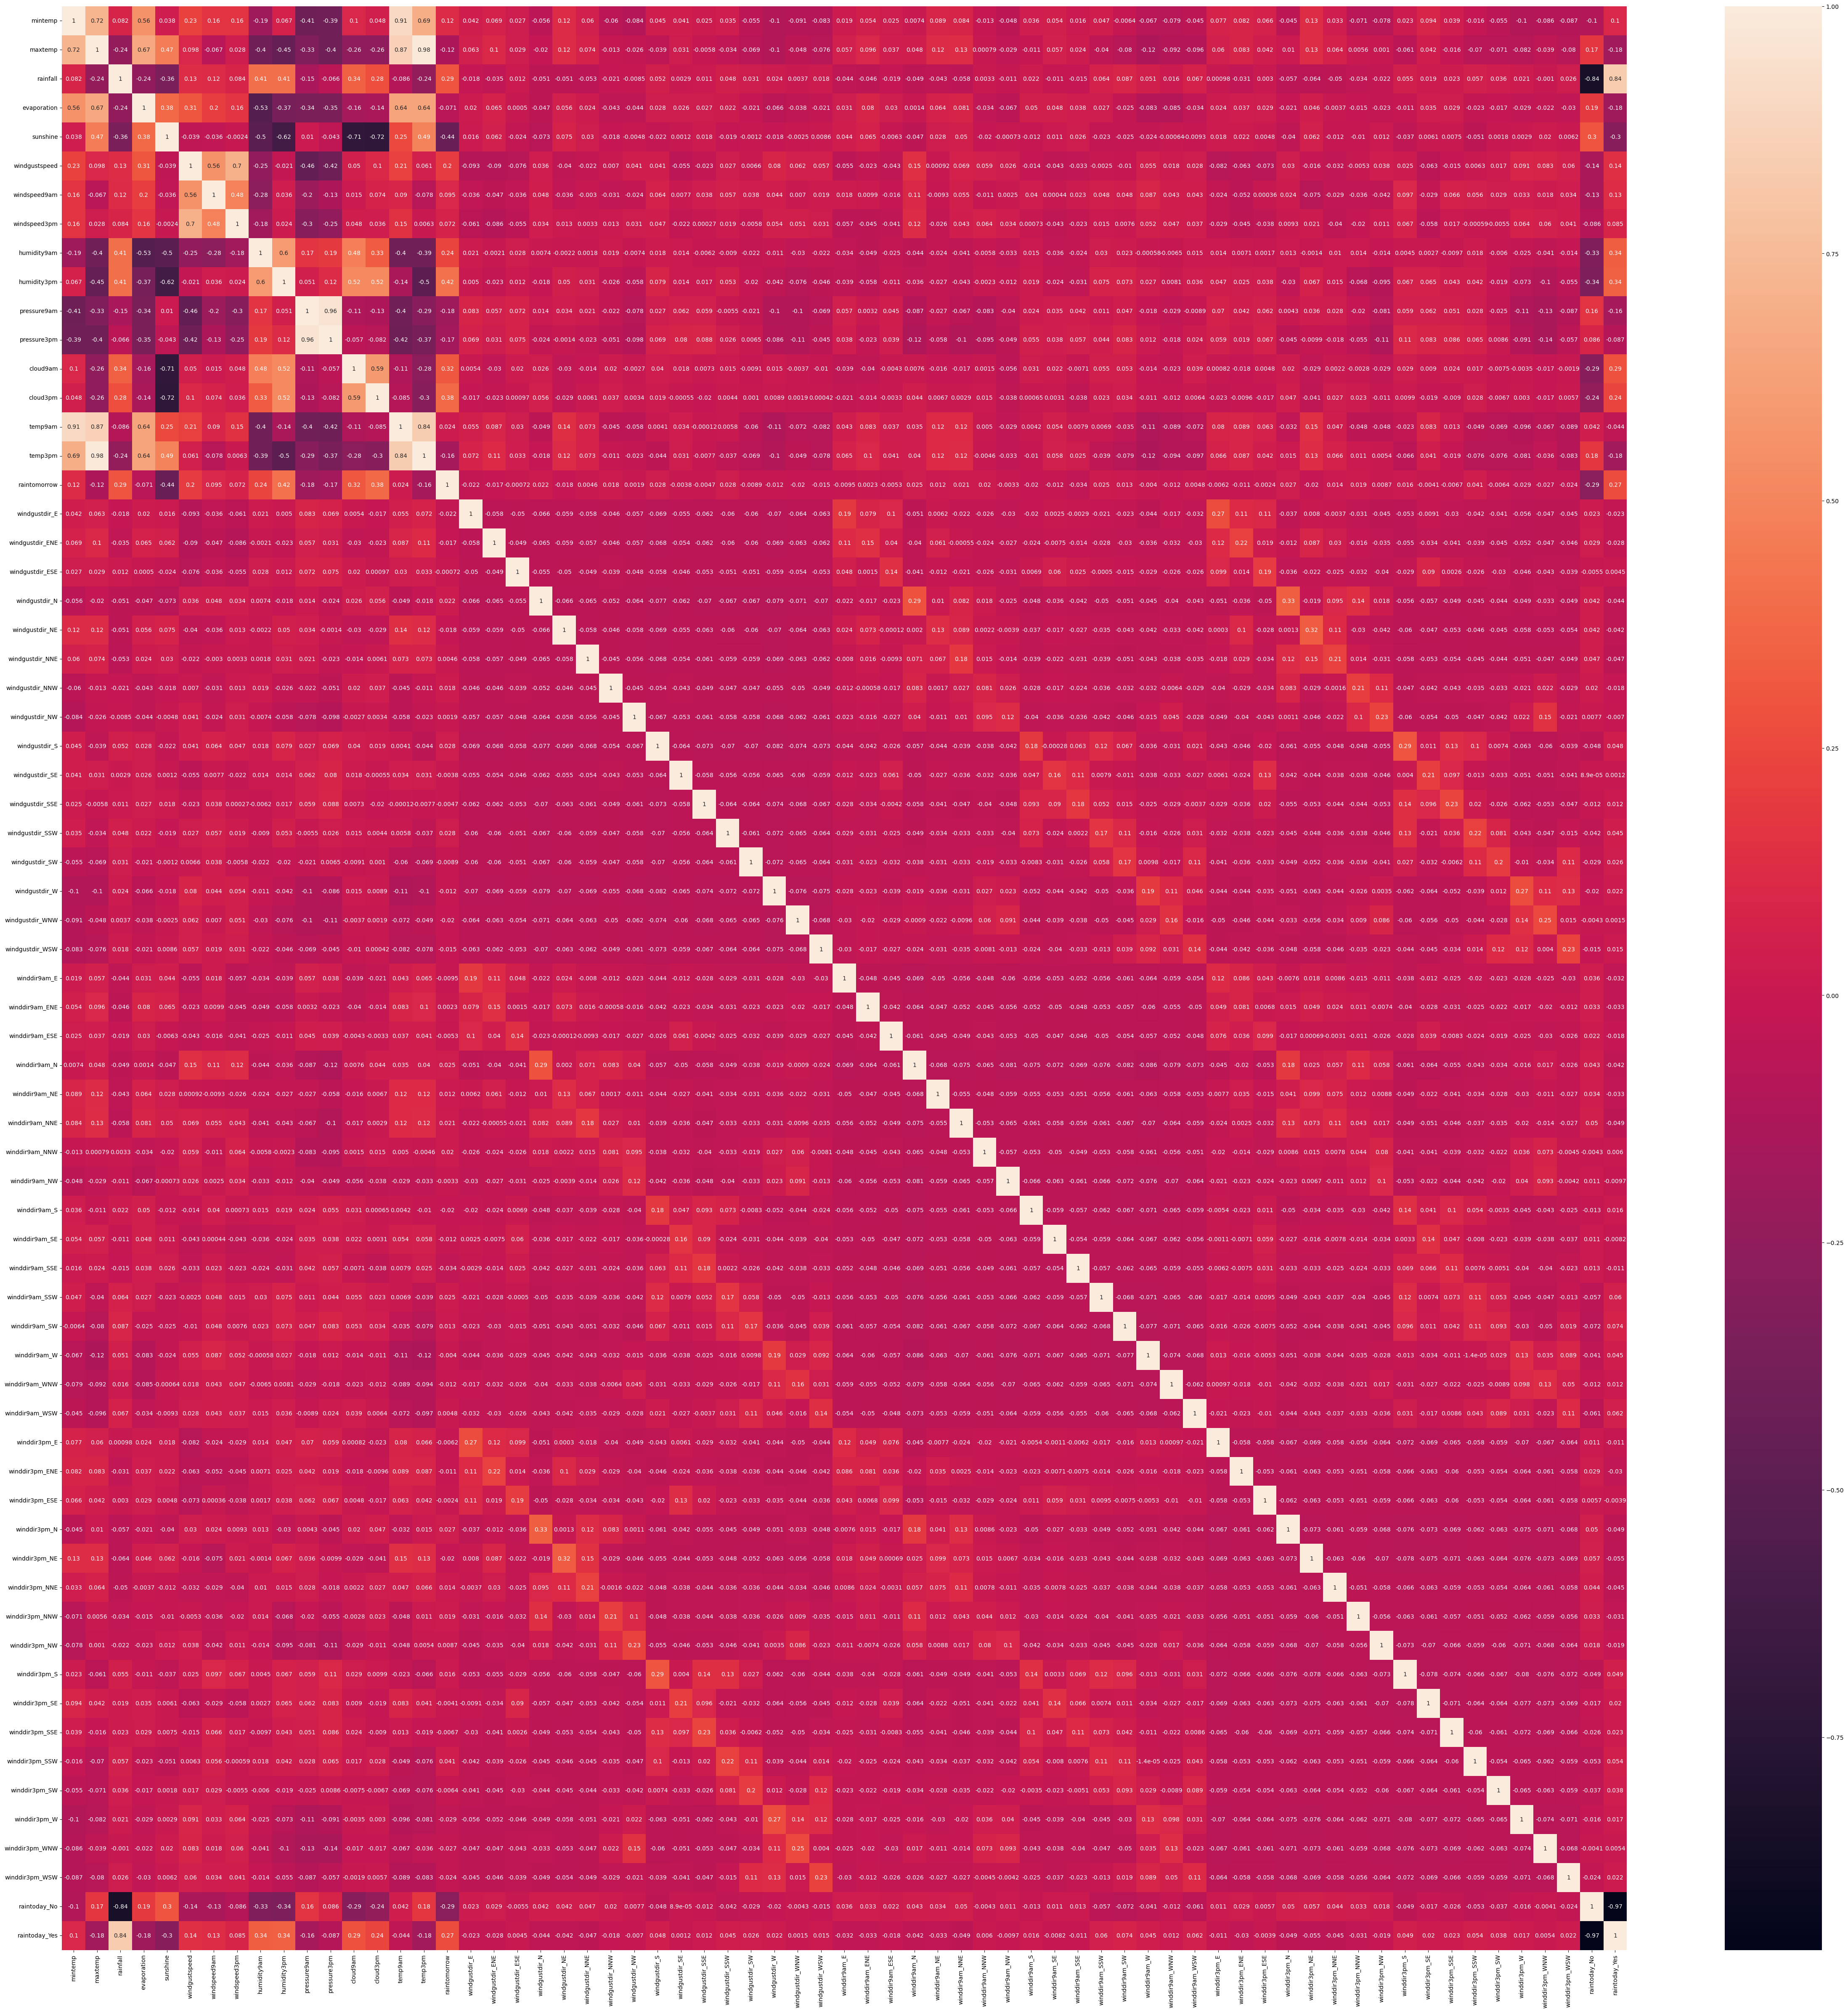

In [1]:
import pandas as pd
import numpy as np
db_train = pd.read_csv(r'C:\Users\Sharlotte\Desktop\ml\holdout_data\train.csv')
db_test = pd.read_csv(r'C:\Users\Sharlotte\Desktop\ml\holdout_data\holdout.csv')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

db_train = db_train.drop(columns="row_id")
db_train=pd.get_dummies(db_train)
db_test = db_test.drop(columns="row_id")
db_test=pd.get_dummies(db_test)


new=[]



target_col = "raintomorrow"
id_cols = ["row_id"]
numeric_cols = [x for x in db_train.select_dtypes(include=np.number).columns.tolist() if x not in id_cols]
X_train = db_train[numeric_cols].fillna(db_train.interpolate()).values
X_test = db_test[numeric_cols].fillna(db_test.interpolate()).values
X_train = db_train[numeric_cols].fillna(db_train.mean()).values
X_test = db_test[numeric_cols].fillna(db_test.mean()).values
      
        
plt.figure (figsize = [60, 60])
sns.heatmap(db_train.corr(method='spearman'), annot = True)


In [5]:
import pandas as pd
import numpy as np
db_train = pd.read_csv(r'C:\Users\Sharlotte\Desktop\ml\holdout_data\train.csv')
db_test = pd.read_csv(r'C:\Users\Sharlotte\Desktop\ml\holdout_data\holdout.csv')
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from math import *
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

db_train = db_train.drop(columns="row_id")
db_train=pd.get_dummies(db_train)
db_test = db_test.drop(columns="row_id")
db_test=pd.get_dummies(db_test)
target_col = "raintomorrow"
id_cols = ["row_id"]

for_drop = ['raintomorrow', 'mintemp', 'maxtemp', 'temp9am', 'raintoday_Yes',
        'windgustdir_E', 'windgustdir_ENE', 'windgustdir_ESE', 'windgustdir_N', 'windgustdir_NE',
       'windgustdir_NNE', 'windgustdir_NNW', 'windgustdir_NW', 'windgustdir_S',
       'windgustdir_SE', 'windgustdir_SSE', 'windgustdir_SSW',
       'windgustdir_SW', 'windgustdir_W', 'windgustdir_WNW', 'windgustdir_WSW']

db_train['p_p']=db_train['pressure3pm']-db_train['pressure9am']
db_test['p_p']=db_test['pressure3pm']-db_test['pressure9am']
db_train['t_t']=db_train['maxtemp']-db_train['mintemp']
db_test['t_t']=db_test['maxtemp']-db_test['mintemp']
db_train['t_t2']=(db_train['temp3pm']+db_train['temp9am'])/2
db_test['t_t2']=(db_test['temp3pm']+db_test['temp9am'])/2
db_train['rr']=db_train['pressure3pm']*db_train['raintoday_Yes']
db_test['rr']=db_test['pressure3pm']*db_test['raintoday_Yes']  
db_train['cc']=db_train['windgustspeed']*db_train['raintoday_Yes']
db_test['cc']=db_test['windgustspeed']*db_test['raintoday_Yes']
db_train['new1']=db_train['windspeed9am']-db_train['windgustspeed']
db_test['new1']=db_test['windspeed9am']-db_test['windgustspeed']
db_train['new2']=db_train['windgustspeed']-db_train['windspeed3pm']
db_test['new2']=db_test['windgustspeed']-db_test['windspeed3pm']   
db_train['new3']=db_train['windgustspeed']-db_train['pressure3pm']
db_test['new3']=db_test['windgustspeed']-db_test['pressure3pm']
db_train['new5']=db_train['windgustspeed']-db_train['temp9am']
db_test['new5']=db_test['windgustspeed']-db_test['temp9am']
db_train['new4']=db_train['windgustspeed']-db_train['sunshine']
db_test['new4']=db_test['windgustspeed']-db_test['sunshine']

Y_train = db_train[target_col].values
db_train.drop(columns=for_drop, inplace=True)
Y_test = db_test[target_col].values
db_test.drop(columns=for_drop, inplace=True)

numeric_cols = [x for x in db_train.select_dtypes(include=np.number).columns.tolist() if x not in id_cols]

X_train = db_train[numeric_cols].fillna(db_train.mean()).values
X_test = db_test[numeric_cols].fillna(db_test.mean()).values


clf = RandomForestClassifier(criterion='entropy', max_depth=24, n_estimators=1982, min_samples_leaf=2, random_state=42, bootstrap=True, n_jobs=-3)
grid = {
  'n_estimators' : np.arange(1970, 1990, 1)
  #'criterion' : np.array(['gini', 'entropy'])
  #'max_depth' : np.arange(1, 100, 2),
  #'min_samples_leaf' : np.arange(2, 20, 2)
  #'max_features' : np.array(['sqrt', 'log2', None])
  }
grid_searcher=GridSearchCV(clf, grid, cv=2, scoring='roc_auc', n_jobs = -3)
grid_searcher.fit(X_train, Y_train)
print ('The best estimator: ', grid_searcher.best_estimator_)
print ('The score of the best estimator: ', grid_searcher.best_score_)
clf = grid_searcher.best_estimator_

clf.fit(X_train, Y_train)
preds = clf.predict_proba(X_test)[:, 1]
print (roc_auc_score(Y_test, preds))

The best estimator:  RandomForestClassifier(criterion='entropy', max_depth=24, min_samples_leaf=2,
                       n_estimators=1982, n_jobs=-3, random_state=42)
The score of the best estimator:  0.8503758868325553
0.877628634793026


In [6]:
import pandas as pd
import numpy as np
db_train = pd.read_csv(r'C:\Users\Sharlotte\Desktop\ml\holdout_data\train.csv')
db_test = pd.read_csv(r'C:\Users\Sharlotte\Desktop\ml\holdout_data\holdout.csv')
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from math import *
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

db_train = db_train.drop(columns="row_id")
db_train=pd.get_dummies(db_train)
db_test = db_test.drop(columns="row_id")
db_test=pd.get_dummies(db_test)
target_col = "raintomorrow"
id_cols = ["row_id"]

for_drop = ['raintomorrow', 'mintemp', 'maxtemp', 'temp9am', 'raintoday_Yes',
        'windgustdir_E', 'windgustdir_ENE', 'windgustdir_ESE', 'windgustdir_N', 'windgustdir_NE',
       'windgustdir_NNE', 'windgustdir_NNW', 'windgustdir_NW', 'windgustdir_S',
       'windgustdir_SE', 'windgustdir_SSE', 'windgustdir_SSW',
       'windgustdir_SW', 'windgustdir_W', 'windgustdir_WNW', 'windgustdir_WSW']

db_train['p_p']=db_train['pressure3pm']-db_train['pressure9am']
db_test['p_p']=db_test['pressure3pm']-db_test['pressure9am']
db_train['t_t']=db_train['maxtemp']-db_train['mintemp']
db_test['t_t']=db_test['maxtemp']-db_test['mintemp']
db_train['t_t2']=(db_train['temp3pm']+db_train['temp9am'])/2
db_test['t_t2']=(db_test['temp3pm']+db_test['temp9am'])/2
db_train['rr']=db_train['pressure3pm']*db_train['raintoday_Yes']
db_test['rr']=db_test['pressure3pm']*db_test['raintoday_Yes']  
db_train['cc']=db_train['windgustspeed']*db_train['raintoday_Yes']
db_test['cc']=db_test['windgustspeed']*db_test['raintoday_Yes']
db_train['new1']=db_train['windspeed9am']-db_train['windgustspeed']
db_test['new1']=db_test['windspeed9am']-db_test['windgustspeed']
db_train['new2']=db_train['windgustspeed']-db_train['windspeed3pm']
db_test['new2']=db_test['windgustspeed']-db_test['windspeed3pm']   
db_train['new3']=db_train['windgustspeed']-db_train['pressure3pm']
db_test['new3']=db_test['windgustspeed']-db_test['pressure3pm']
db_train['new5']=db_train['windgustspeed']-db_train['temp9am']
db_test['new5']=db_test['windgustspeed']-db_test['temp9am']
db_train['new4']=db_train['windgustspeed']-db_train['sunshine']
db_test['new4']=db_test['windgustspeed']-db_test['sunshine']

Y_train = db_train[target_col].values
db_train.drop(columns=for_drop, inplace=True)
Y_test = db_test[target_col].values
db_test.drop(columns=for_drop, inplace=True)

numeric_cols = [x for x in db_train.select_dtypes(include=np.number).columns.tolist() if x not in id_cols]

X_train = db_train[numeric_cols].fillna(db_train.mean()).values
X_test = db_test[numeric_cols].fillna(db_test.mean()).values


clf = RandomForestClassifier(criterion='entropy', max_depth=24, n_estimators=1982, min_samples_leaf=2, random_state=42, bootstrap=True, n_jobs=-3)
grid = {
  #'n_estimators' : np.arange(1970, 1990, 1)
  'criterion' : np.array(['gini', 'entropy'])
  #'max_depth' : np.arange(1, 100, 2),
  #'min_samples_leaf' : np.arange(2, 20, 2)
  #'max_features' : np.array(['sqrt', 'log2', None])
  }
grid_searcher=GridSearchCV(clf, grid, cv=2, scoring='roc_auc', n_jobs = -3)
grid_searcher.fit(X_train, Y_train)
print ('The best estimator: ', grid_searcher.best_estimator_)
print ('The score of the best estimator: ', grid_searcher.best_score_)
clf = grid_searcher.best_estimator_

clf.fit(X_train, Y_train)
preds = clf.predict_proba(X_test)[:, 1]
print (roc_auc_score(Y_test, preds))

The best estimator:  RandomForestClassifier(criterion='entropy', max_depth=24, min_samples_leaf=2,
                       n_estimators=1982, n_jobs=-3, random_state=42)
The score of the best estimator:  0.8503758868325553
0.877628634793026


In [7]:
import pandas as pd
import numpy as np
db_train = pd.read_csv(r'C:\Users\Sharlotte\Desktop\ml\holdout_data\train.csv')
db_test = pd.read_csv(r'C:\Users\Sharlotte\Desktop\ml\holdout_data\holdout.csv')
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from math import *
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

db_train = db_train.drop(columns="row_id")
db_train=pd.get_dummies(db_train)
db_test = db_test.drop(columns="row_id")
db_test=pd.get_dummies(db_test)
target_col = "raintomorrow"
id_cols = ["row_id"]

for_drop = ['raintomorrow', 'mintemp', 'maxtemp', 'temp9am', 'raintoday_Yes',
        'windgustdir_E', 'windgustdir_ENE', 'windgustdir_ESE', 'windgustdir_N', 'windgustdir_NE',
       'windgustdir_NNE', 'windgustdir_NNW', 'windgustdir_NW', 'windgustdir_S',
       'windgustdir_SE', 'windgustdir_SSE', 'windgustdir_SSW',
       'windgustdir_SW', 'windgustdir_W', 'windgustdir_WNW', 'windgustdir_WSW']

db_train['p_p']=db_train['pressure3pm']-db_train['pressure9am']
db_test['p_p']=db_test['pressure3pm']-db_test['pressure9am']
db_train['t_t']=db_train['maxtemp']-db_train['mintemp']
db_test['t_t']=db_test['maxtemp']-db_test['mintemp']
db_train['t_t2']=(db_train['temp3pm']+db_train['temp9am'])/2
db_test['t_t2']=(db_test['temp3pm']+db_test['temp9am'])/2
db_train['rr']=db_train['pressure3pm']*db_train['raintoday_Yes']
db_test['rr']=db_test['pressure3pm']*db_test['raintoday_Yes']  
db_train['cc']=db_train['windgustspeed']*db_train['raintoday_Yes']
db_test['cc']=db_test['windgustspeed']*db_test['raintoday_Yes']
db_train['new1']=db_train['windspeed9am']-db_train['windgustspeed']
db_test['new1']=db_test['windspeed9am']-db_test['windgustspeed']
db_train['new2']=db_train['windgustspeed']-db_train['windspeed3pm']
db_test['new2']=db_test['windgustspeed']-db_test['windspeed3pm']   
db_train['new3']=db_train['windgustspeed']-db_train['pressure3pm']
db_test['new3']=db_test['windgustspeed']-db_test['pressure3pm']
db_train['new5']=db_train['windgustspeed']-db_train['temp9am']
db_test['new5']=db_test['windgustspeed']-db_test['temp9am']
db_train['new4']=db_train['windgustspeed']-db_train['sunshine']
db_test['new4']=db_test['windgustspeed']-db_test['sunshine']

Y_train = db_train[target_col].values
db_train.drop(columns=for_drop, inplace=True)
Y_test = db_test[target_col].values
db_test.drop(columns=for_drop, inplace=True)

numeric_cols = [x for x in db_train.select_dtypes(include=np.number).columns.tolist() if x not in id_cols]

X_train = db_train[numeric_cols].fillna(db_train.mean()).values
X_test = db_test[numeric_cols].fillna(db_test.mean()).values


clf = RandomForestClassifier(criterion='entropy', max_depth=24, n_estimators=1982, min_samples_leaf=2, random_state=42, bootstrap=True, n_jobs=-3)
grid = {
  #'n_estimators' : np.arange(1970, 1990, 1)
  #'criterion' : np.array(['gini', 'entropy'])
  'max_depth' : np.arange(1, 50, 2),
  #'min_samples_leaf' : np.arange(2, 20, 2)
  #'max_features' : np.array(['sqrt', 'log2', None])
  }
grid_searcher=GridSearchCV(clf, grid, cv=2, scoring='roc_auc', n_jobs = -3)
grid_searcher.fit(X_train, Y_train)
print ('The best estimator: ', grid_searcher.best_estimator_)
print ('The score of the best estimator: ', grid_searcher.best_score_)
clf = grid_searcher.best_estimator_

clf.fit(X_train, Y_train)
preds = clf.predict_proba(X_test)[:, 1]
print (roc_auc_score(Y_test, preds))

The best estimator:  RandomForestClassifier(criterion='entropy', max_depth=27, min_samples_leaf=2,
                       n_estimators=1982, n_jobs=-3, random_state=42)
The score of the best estimator:  0.8503139440142671
0.8774201529492525


In [1]:
import pandas as pd
import numpy as np
db_train = pd.read_csv(r'C:\Users\Sharlotte\Desktop\ml\holdout_data\train.csv')
db_test = pd.read_csv(r'C:\Users\Sharlotte\Desktop\ml\holdout_data\holdout.csv')
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from math import *
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

db_train = db_train.drop(columns="row_id")
db_train=pd.get_dummies(db_train)
db_test = db_test.drop(columns="row_id")
db_test=pd.get_dummies(db_test)
target_col = "raintomorrow"
id_cols = ["row_id"]

for_drop = ['raintomorrow', 'mintemp', 'maxtemp', 'temp9am', 'raintoday_Yes',
        'windgustdir_E', 'windgustdir_ENE', 'windgustdir_ESE', 'windgustdir_N', 'windgustdir_NE',
       'windgustdir_NNE', 'windgustdir_NNW', 'windgustdir_NW', 'windgustdir_S',
       'windgustdir_SE', 'windgustdir_SSE', 'windgustdir_SSW',
       'windgustdir_SW', 'windgustdir_W', 'windgustdir_WNW', 'windgustdir_WSW']

db_train['p_p']=db_train['pressure3pm']-db_train['pressure9am']
db_test['p_p']=db_test['pressure3pm']-db_test['pressure9am']
db_train['t_t']=db_train['maxtemp']-db_train['mintemp']
db_test['t_t']=db_test['maxtemp']-db_test['mintemp']
db_train['t_t2']=(db_train['temp3pm']+db_train['temp9am'])/2
db_test['t_t2']=(db_test['temp3pm']+db_test['temp9am'])/2
db_train['rr']=db_train['pressure3pm']*db_train['raintoday_Yes']
db_test['rr']=db_test['pressure3pm']*db_test['raintoday_Yes']  
db_train['cc']=db_train['windgustspeed']*db_train['raintoday_Yes']
db_test['cc']=db_test['windgustspeed']*db_test['raintoday_Yes']
db_train['new1']=db_train['windspeed9am']-db_train['windgustspeed']
db_test['new1']=db_test['windspeed9am']-db_test['windgustspeed']
db_train['new2']=db_train['windgustspeed']-db_train['windspeed3pm']
db_test['new2']=db_test['windgustspeed']-db_test['windspeed3pm']   
db_train['new3']=db_train['windgustspeed']-db_train['pressure3pm']
db_test['new3']=db_test['windgustspeed']-db_test['pressure3pm']
db_train['new5']=db_train['windgustspeed']-db_train['temp9am']
db_test['new5']=db_test['windgustspeed']-db_test['temp9am']
db_train['new4']=db_train['windgustspeed']-db_train['sunshine']
db_test['new4']=db_test['windgustspeed']-db_test['sunshine']

Y_train = db_train[target_col].values
db_train.drop(columns=for_drop, inplace=True)
Y_test = db_test[target_col].values
db_test.drop(columns=for_drop, inplace=True)

numeric_cols = [x for x in db_train.select_dtypes(include=np.number).columns.tolist() if x not in id_cols]

X_train = db_train[numeric_cols].fillna(db_train.mean()).values
X_test = db_test[numeric_cols].fillna(db_test.mean()).values

clf = RandomForestClassifier(criterion='entropy', max_depth=24, n_estimators=1982, min_samples_leaf=2, random_state=42, bootstrap=True, n_jobs=-3)
'''grid = {
  #'n_estimators' : np.arange(1970, 1990, 1)
  #'criterion' : np.array(['gini', 'entropy'])
  #'max_depth' : np.arange(1, 100, 2),
  #'min_samples_leaf' : np.arange(2, 20, 2)
  #'max_features' : np.array(['sqrt', 'log2', None])
  }
grid_searcher=GridSearchCV(clf, grid, cv=2, scoring='roc_auc', n_jobs = -3)
grid_searcher.fit(X_train, Y_train)
print ('The best estimator: ', grid_searcher.best_estimator_)
print ('The score of the best estimator: ', grid_searcher.best_score_)
clf = grid_searcher.best_estimator_'''

clf.fit(X_train, Y_train)
preds = clf.predict_proba(X_test)[:, 1]
print ('Final score: ', roc_auc_score(Y_test, preds))


Final score:  0.877628634793026
